<a href="https://colab.research.google.com/github/irwanmaulana42/google-collab/blob/master/Anomaly_based_Network_Intrusion_Detection_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Anomaly Detection based Network Intrusion Detection System**


### **Deep Neural Networks**

A deep neural network (DNN) is an artificial neural network (ANN) with multiple layers between the input and output layers. The DNN finds the correct mathematical manipulation to turn the input into the output, whether it be a linear relationship or a non-linear relationship.

> Note : We are evaluating neural networks with several different hidden layers configuration. Current epochs has been set to 50, one can change it accordingly.




In [ ]:
%cd /content
!rm -rf 'anomaly-detection-system'
!git clone https://github.com/piyush-palta/anomaly-detection-system

/content
Cloning into 'anomaly-detection-system'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 12 (delta 2), reused 10 (delta 2), pack-reused 0
Unpacking objects: 100% (12/12), 3.49 MiB | 1.28 MiB/s, done.


In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from sklearn import metrics
from sklearn.preprocessing import Normalizer

np.random.seed(1337)  # for reproducibility

traindata = pd.read_csv('/content/anomaly-detection-system/dataset/training.csv', header=None)
testdata = pd.read_csv('/content/anomaly-detection-system/dataset/testing.csv', header=None)


X = traindata.iloc[:,1:42]
Y = traindata.iloc[:,0]
C = testdata.iloc[:,0]
T = testdata.iloc[:,1:42]

trainX = np.array(X)
testT = np.array(T)

trainX.astype(float)
testT.astype(float)

scaler = Normalizer().fit(trainX)
trainX = scaler.transform(trainX)

scaler = Normalizer().fit(testT)
testT = scaler.transform(testT)

y_train = np.array(Y)
y_test = np.array(C)

X_train = np.array(trainX)
X_test = np.array(testT)

batch_size = 64

In [ ]:
import keras.backend as K
from keras.metrics import Precision, Recall

def f1_score(y_true, y_pred):
    """
    F1 score metric.
    """
    def recall(y_true, y_pred):
        """
        Recall metric.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """
        Precision metric.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    f1_score = 2*((precision*recall)/(precision+recall+K.epsilon()))
    return f1_score

precision = Precision()
recall = Recall()
f1score = f1_score

**Deep Neural Networks with 1 Hidden Layer**


Epoch 1/5
7720/7720 [==============================] - 81s 10ms/step - loss: 0.0242 - accuracy: 0.9910 - precision: 0.9959 - recall: 0.9596 - f1_score: 0.9942 - val_loss: 0.5464 - val_accuracy: 0.9211 - val_precision: 0.9952 - val_recall: 0.9063 - val_f1_score: 0.7565
Epoch 2/5
7720/7720 [==============================] - 54s 7ms/step - loss: 0.0107 - accuracy: 0.9970 - precision: 0.9986 - recall: 0.9977 - f1_score: 0.9981 - val_loss: 0.5470 - val_accuracy: 0.9212 - val_precision: 0.9952 - val_recall: 0.9065 - val_f1_score: 0.7534
Epoch 3/5
7720/7720 [==============================] - 47s 6ms/step - loss: 0.0089 - accuracy: 0.9972 - precision: 0.9986 - recall: 0.9980 - f1_score: 0.9983 - val_loss: 0.5120 - val_accuracy: 0.9229 - val_precision: 0.9946 - val_recall: 0.9092 - val_f1_score: 0.7625
Epoch 4/5
7720/7720 [==============================] - 53s 7ms/step - loss: 0.0080 - accuracy: 0.9975 - precision: 0.9987 - recall: 0.9981 - f1_score: 0.9984 - val_loss: 0.6174 - val_accuracy: 0.

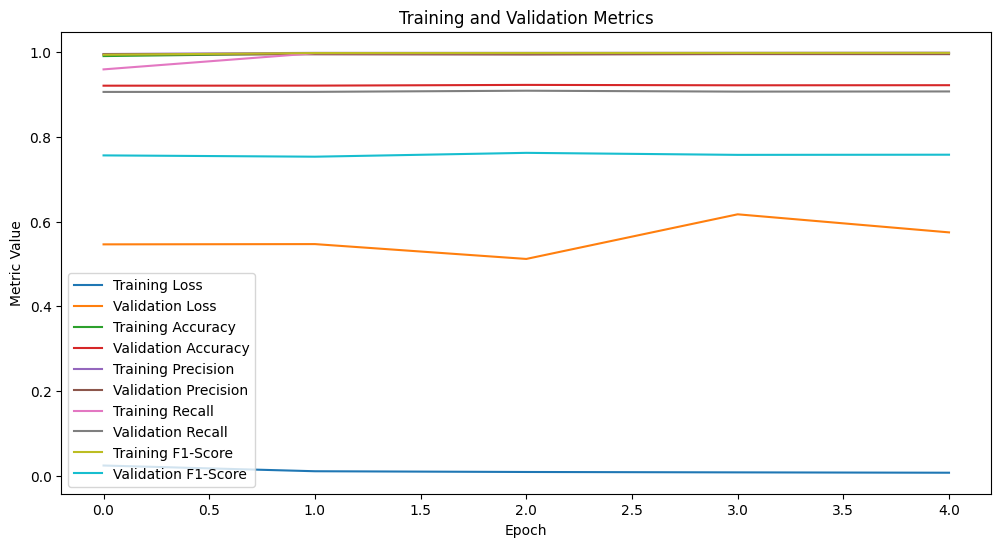

In [ ]:
import matplotlib.pyplot as plt

# 1. define the network
model = Sequential()
model.add(Dense(512,input_dim=41,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy', precision, recall, f1score])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=5)
model.save("model_nn1.hdf5")

# buat grafik
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(history.history['loss'], label='Training Loss')
ax.plot(history.history['val_loss'], label='Validation Loss')
ax.plot(history.history['accuracy'], label='Training Accuracy')
ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax.plot(history.history['precision'], label='Training Precision')
ax.plot(history.history['val_precision'], label='Validation Precision')
ax.plot(history.history['recall'], label='Training Recall')
ax.plot(history.history['val_recall'], label='Validation Recall')
ax.plot(history.history['f1_score'], label='Training F1-Score')
ax.plot(history.history['val_f1_score'], label='Validation F1-Score')

# tambahkan judul dan label pada sumbu x dan y
ax.set_title('Training and Validation Metrics')
ax.set_xlabel('Epoch')
ax.set_ylabel('Metric Value')

# tambahkan legend pada grafik
ax.legend()

# tampilkan grafik
plt.show()


**Deep Neural Networks with 2 Hidden Layer**


Epoch 1/5
7720/7720 [==============================] - 58s 7ms/step - loss: 0.0143 - accuracy: 0.9952 - precision: 0.9969 - recall: 0.9619 - f1_score: 0.9970 - val_loss: 0.5069 - val_accuracy: 0.9221 - val_precision: 0.9958 - val_recall: 0.9072 - val_f1_score: 0.7569
Epoch 2/5
7720/7720 [==============================] - 47s 6ms/step - loss: 0.0076 - accuracy: 0.9977 - precision: 0.9990 - recall: 0.9982 - f1_score: 0.9986 - val_loss: 0.7941 - val_accuracy: 0.9221 - val_precision: 0.9986 - val_recall: 0.9046 - val_f1_score: 0.7522
Epoch 3/5
7720/7720 [==============================] - 47s 6ms/step - loss: 0.0062 - accuracy: 0.9981 - precision: 0.9992 - recall: 0.9985 - f1_score: 0.9988 - val_loss: 0.7847 - val_accuracy: 0.9252 - val_precision: 0.9961 - val_recall: 0.9106 - val_f1_score: 0.7700
Epoch 4/5
7720/7720 [==============================] - 55s 7ms/step - loss: 0.0054 - accuracy: 0.9984 - precision: 0.9993 - recall: 0.9987 - f1_score: 0.9990 - val_loss: 0.5272 - val_accuracy: 0.9

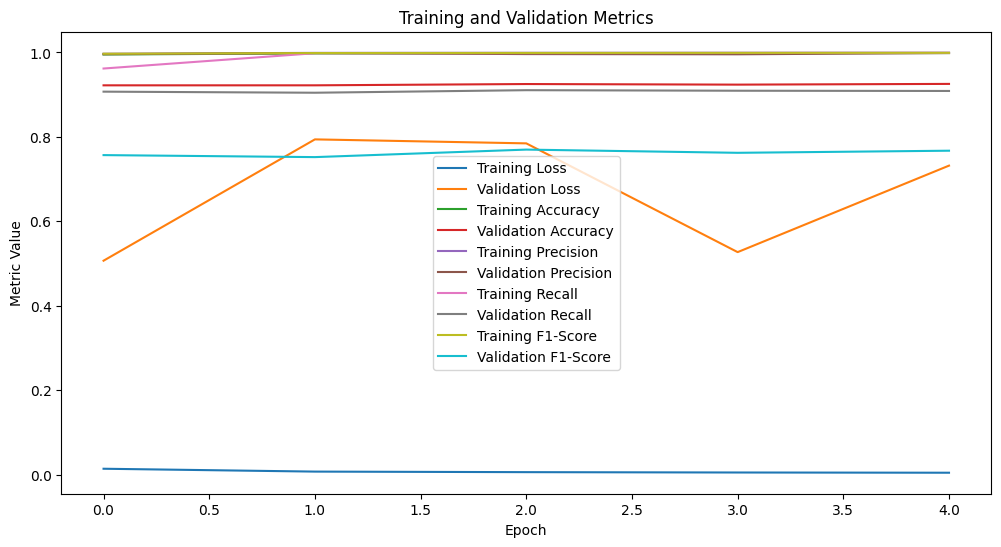

In [ ]:
import matplotlib.pyplot as plt

# define the network
model = Sequential()
model.add(Dense(512,input_dim=41,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(256,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy', precision, recall, f1score])
history2 = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=5)
model.save("model_nn2.hdf5")

# buat grafik
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(history2.history['loss'], label='Training Loss')
ax.plot(history2.history['val_loss'], label='Validation Loss')
ax.plot(history2.history['accuracy'], label='Training Accuracy')
ax.plot(history2.history['val_accuracy'], label='Validation Accuracy')
ax.plot(history2.history['precision'], label='Training Precision')
ax.plot(history2.history['val_precision'], label='Validation Precision')
ax.plot(history2.history['recall'], label='Training Recall')
ax.plot(history2.history['val_recall'], label='Validation Recall')
ax.plot(history2.history['f1_score'], label='Training F1-Score')
ax.plot(history2.history['val_f1_score'], label='Validation F1-Score')

# tambahkan judul dan label pada sumbu x dan y
ax.set_title('Training and Validation Metrics')
ax.set_xlabel('Epoch')
ax.set_ylabel('Metric Value')

# tambahkan legend pada grafik
ax.legend()

# tampilkan grafik
plt.show()

**Deep Neural Networks with 3 Hidden Layer**


Epoch 1/5
7720/7720 [==============================] - 52s 6ms/step - loss: 0.0128 - accuracy: 0.9959 - precision: 0.9983 - recall: 0.9627 - f1_score: 0.9974 - val_loss: 0.5293 - val_accuracy: 0.9191 - val_precision: 0.9988 - val_recall: 0.9006 - val_f1_score: 0.7521
Epoch 2/5
7720/7720 [==============================] - 57s 7ms/step - loss: 0.0076 - accuracy: 0.9978 - precision: 0.9990 - recall: 0.9982 - f1_score: 0.9986 - val_loss: 0.8868 - val_accuracy: 0.9230 - val_precision: 0.9956 - val_recall: 0.9084 - val_f1_score: 0.7594
Epoch 3/5
7720/7720 [==============================] - 48s 6ms/step - loss: 0.0063 - accuracy: 0.9982 - precision: 0.9992 - recall: 0.9986 - f1_score: 0.9989 - val_loss: 0.6934 - val_accuracy: 0.9250 - val_precision: 0.9946 - val_recall: 0.9117 - val_f1_score: 0.7709
Epoch 4/5
7720/7720 [==============================] - 49s 6ms/step - loss: 0.0056 - accuracy: 0.9984 - precision: 0.9992 - recall: 0.9987 - f1_score: 0.9990 - val_loss: 0.7133 - val_accuracy: 0.9

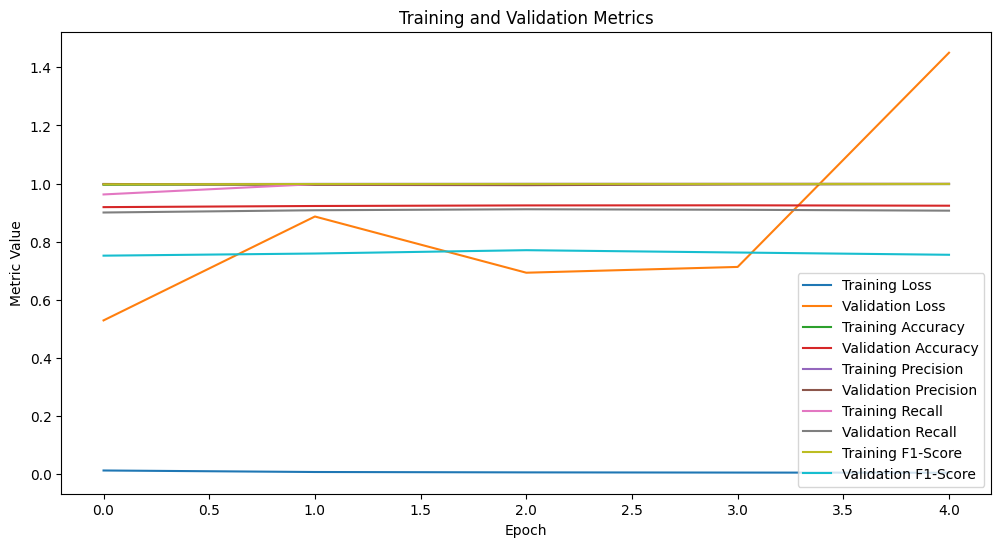

In [ ]:
import matplotlib.pyplot as plt

model = Sequential()
model.add(Dense(1024,input_dim=41,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(768,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(512,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy', precision, recall, f1score])
history3 = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=5)
model.save("model_nn3.hdf5")

# buat grafik
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(history3.history['loss'], label='Training Loss')
ax.plot(history3.history['val_loss'], label='Validation Loss')
ax.plot(history3.history['accuracy'], label='Training Accuracy')
ax.plot(history3.history['val_accuracy'], label='Validation Accuracy')
ax.plot(history3.history['precision'], label='Training Precision')
ax.plot(history3.history['val_precision'], label='Validation Precision')
ax.plot(history3.history['recall'], label='Training Recall')
ax.plot(history3.history['val_recall'], label='Validation Recall')
ax.plot(history3.history['f1_score'], label='Training F1-Score')
ax.plot(history3.history['val_f1_score'], label='Validation F1-Score')

# tambahkan judul dan label pada sumbu x dan y
ax.set_title('Training and Validation Metrics')
ax.set_xlabel('Epoch')
ax.set_ylabel('Metric Value')

# tambahkan legend pada grafik
ax.legend()

# tampilkan grafik
plt.show()

**Deep Neural Networks with 4 Hidden Layer**


Epoch 1/5
7720/7720 [==============================] - 54s 7ms/step - loss: 0.0135 - accuracy: 0.9957 - precision: 0.9986 - recall: 0.9616 - f1_score: 0.9973 - val_loss: 0.7411 - val_accuracy: 0.9224 - val_precision: 0.9965 - val_recall: 0.9068 - val_f1_score: 0.7531
Epoch 2/5
7720/7720 [==============================] - 51s 7ms/step - loss: 0.0081 - accuracy: 0.9976 - precision: 0.9991 - recall: 0.9980 - f1_score: 0.9985 - val_loss: 0.9765 - val_accuracy: 0.9230 - val_precision: 0.9973 - val_recall: 0.9068 - val_f1_score: 0.7556
Epoch 3/5
7720/7720 [==============================] - 54s 7ms/step - loss: 0.0069 - accuracy: 0.9980 - precision: 0.9993 - recall: 0.9982 - f1_score: 0.9987 - val_loss: 1.2938 - val_accuracy: 0.9236 - val_precision: 0.9987 - val_recall: 0.9063 - val_f1_score: 0.7561
Epoch 4/5
7720/7720 [==============================] - 52s 7ms/step - loss: 0.0061 - accuracy: 0.9982 - precision: 0.9994 - recall: 0.9984 - f1_score: 0.9989 - val_loss: 0.9211 - val_accuracy: 0.9

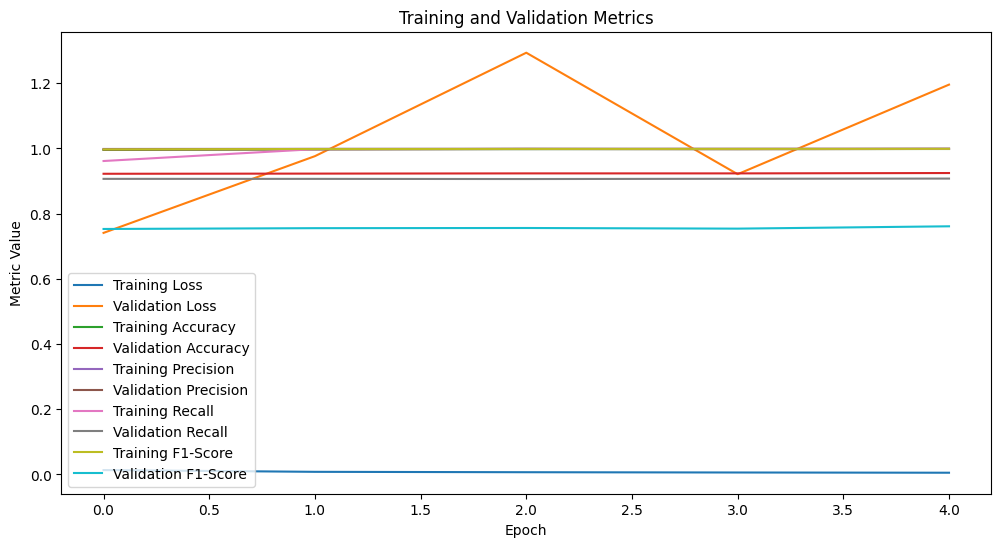

In [ ]:
import matplotlib.pyplot as plt

model = Sequential()
model.add(Dense(1024,input_dim=41,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(768,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(512,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(256,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy', precision, recall, f1score])
history4 = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=5)
model.save("model_nn4.hdf5")

# buat grafik
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(history4.history['loss'], label='Training Loss')
ax.plot(history4.history['val_loss'], label='Validation Loss')
ax.plot(history4.history['accuracy'], label='Training Accuracy')
ax.plot(history4.history['val_accuracy'], label='Validation Accuracy')
ax.plot(history4.history['precision'], label='Training Precision')
ax.plot(history4.history['val_precision'], label='Validation Precision')
ax.plot(history4.history['recall'], label='Training Recall')
ax.plot(history4.history['val_recall'], label='Validation Recall')
ax.plot(history4.history['f1_score'], label='Training F1-Score')
ax.plot(history4.history['val_f1_score'], label='Validation F1-Score')

# tambahkan judul dan label pada sumbu x dan y
ax.set_title('Training and Validation Metrics')
ax.set_xlabel('Epoch')
ax.set_ylabel('Metric Value')

# tambahkan legend pada grafik
ax.legend()

# tampilkan grafik
plt.show()


**Deep Neural Networks with 5 Hidden Layer**


Epoch 1/5
7720/7720 [==============================] - 65s 8ms/step - loss: 0.0142 - accuracy: 0.9954 - precision: 0.9983 - recall: 0.9620 - f1_score: 0.9970 - val_loss: 1.4020 - val_accuracy: 0.9224 - val_precision: 0.9985 - val_recall: 0.9050 - val_f1_score: 0.7594
Epoch 2/5
7720/7720 [==============================] - 53s 7ms/step - loss: 0.0085 - accuracy: 0.9976 - precision: 0.9991 - recall: 0.9979 - f1_score: 0.9985 - val_loss: 1.1465 - val_accuracy: 0.9223 - val_precision: 0.9955 - val_recall: 0.9076 - val_f1_score: 0.7554
Epoch 3/5
7720/7720 [==============================] - 54s 7ms/step - loss: 0.0067 - accuracy: 0.9980 - precision: 0.9993 - recall: 0.9983 - f1_score: 0.9988 - val_loss: 0.8852 - val_accuracy: 0.9254 - val_precision: 0.9985 - val_recall: 0.9087 - val_f1_score: 0.7620
Epoch 4/5
7720/7720 [==============================] - 54s 7ms/step - loss: 0.0061 - accuracy: 0.9983 - precision: 0.9993 - recall: 0.9986 - f1_score: 0.9989 - val_loss: 0.8079 - val_accuracy: 0.9

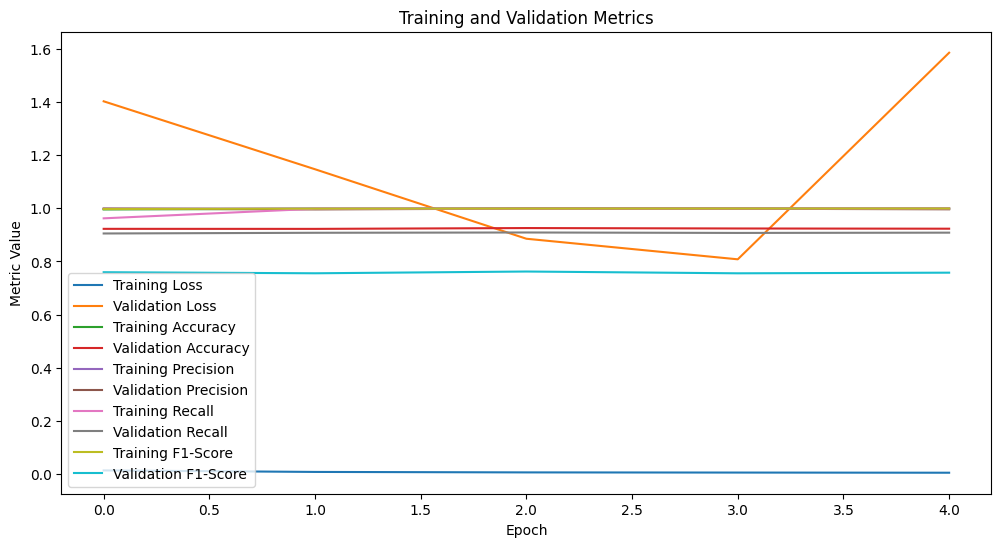

In [ ]:
import matplotlib.pyplot as plt

model = Sequential()
model.add(Dense(1024,input_dim=41,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(768,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(512,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(256,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(128,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy', precision, recall, f1score])
history5 = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=5)
model.save("model_nn5.hdf5")

# buat grafik
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(history5.history['loss'], label='Training Loss')
ax.plot(history5.history['val_loss'], label='Validation Loss')
ax.plot(history5.history['accuracy'], label='Training Accuracy')
ax.plot(history5.history['val_accuracy'], label='Validation Accuracy')
ax.plot(history5.history['precision'], label='Training Precision')
ax.plot(history5.history['val_precision'], label='Validation Precision')
ax.plot(history5.history['recall'], label='Training Recall')
ax.plot(history5.history['val_recall'], label='Validation Recall')
ax.plot(history5.history['f1_score'], label='Training F1-Score')
ax.plot(history5.history['val_f1_score'], label='Validation F1-Score')

# tambahkan judul dan label pada sumbu x dan y
ax.set_title('Training and Validation Metrics')
ax.set_xlabel('Epoch')
ax.set_ylabel('Metric Value')

# tambahkan legend pada grafik
ax.legend()

# tampilkan grafik
plt.show()